# Анализ данных лояльности клиентов

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Считывание данных

In [2]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/383523/lesson_3_data__1_.csv',
                 encoding='windows-1251')

In [3]:
df.head()

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,...,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,...,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta


## Подготовка данных

### Выберем и переименуем нужные колонки

In [4]:
user_df = df[['tc', 'art_sp']]

In [5]:
user_df = user_df.rename(columns={'tc':'user_id', 'art_sp':'brand_info'})

In [6]:
user_df.head()

,user_id,brand_info
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2


### Выделим название бренда из столбца "brand_info"

In [7]:
user_df['brand_name'] = user_df.brand_info.apply(lambda s : s.split(' ')[-1])

In [8]:
user_df.head()

,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2


## Выберем нужных клиентов

### Найдем количество покопук у каждого клиента

In [9]:
users_purchases = user_df.groupby('user_id', as_index=False) \
    .aggregate({'brand_name':'count'}) \
    .rename(columns={'brand_name':'purchases'}) 

In [10]:
users_purchases.purchases.describe()

count    11764.000000
mean         4.091210
std          4.573143
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         60.000000
Name: purchases, dtype: float64

### Оставим клиентов, входящие в 0,75-квантиль

In [11]:
users_purchases = users_purchases.query('purchases >= 5')

In [12]:
users_purchases.head()

,user_id,purchases
1,1031,6
2,4241,5
11,25971,7
14,40911,27
16,45181,5


### Посмотрим колличество покупок выбранных клиентов

In [13]:
users_purchases.purchases.median()

7.0

In [14]:
users_purchases.purchases.describe()

count    3383.000000
mean        9.320130
std         5.623993
min         5.000000
25%         6.000000
50%         7.000000
75%        11.000000
max        60.000000
Name: purchases, dtype: float64

## Для каждого клиента найдем колличество покупок по брендам

In [15]:
lovely_brand_purchases_df = user_df \
    .groupby(['user_id', 'brand_name'],  as_index=False) \
    .aggregate({'brand_info':'count'}) \
    .sort_values(['user_id', 'brand_info'], ascending=[False, False])

In [16]:
lovely_brand_purchases_df.head()

,user_id,brand_name,brand_info
18187,1408849249,Store_Brand,1
18186,1408840919,Store_Brand,1
18185,1408832719,Brand_4,3
18184,1408825059,Brand_1,1
18183,1408817589,Store_Brand,2


### Для каждого клиента определим любимый бренд (где больше всего покупок)

In [17]:
lovely_brand_purchases_df = lovely_brand_purchases_df \
    .groupby('user_id') \
    .head(1) \
    .rename(columns={'brand_name':'lovely_brand', 'brand_info':'lovely_brand_purchases'})

In [18]:
lovely_brand_purchases_df.head()

,user_id,lovely_brand,lovely_brand_purchases
18187,1408849249,Store_Brand,1
18186,1408840919,Store_Brand,1
18185,1408832719,Brand_4,3
18184,1408825059,Brand_1,1
18183,1408817589,Store_Brand,2


## Найдем сколько уникальных брендов купил каждый клиент

In [19]:
user_df.head()

,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2


In [20]:
users_unique_brands = user_df \
    .groupby('user_id', as_index=False) \
    .aggregate({'brand_name':pd.Series.nunique}) \
    .rename(columns={'brand_name':'unique_brands'})

In [21]:
users_unique_brands.head()

,user_id,unique_brands
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2


## Найдем долю от всех покупок на любимый бренд клиента

### Объеденим все таблицы вместе

In [22]:
loyalty_df = users_purchases \
    .merge(users_unique_brands, on='user_id') \
    .merge(lovely_brand_purchases_df, on='user_id')

In [23]:
loyalty_df.head()

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases
0,1031,6,2,Store_Brand,5
1,4241,5,2,Brand_4,3
2,25971,7,2,Store_Brand,5
3,40911,27,5,Brand_4,19
4,45181,5,4,Store_Brand,2


### Выведем клиентов, которые покупают только один бренд

In [24]:
loyal_users = loyalty_df[loyalty_df.unique_brands == 1]

In [25]:
loyal_users.head()

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases
13,86281,14,1,Brand_4,14
18,94961,6,1,Brand_4,6
29,132061,9,1,Brand_4,9
30,134281,6,1,Brand_4,6
35,157311,12,1,Brand_4,12


### Найдем какая доля всех покупок клиента пришлась на любимый бренд

In [26]:
loyalty_df['loyalty_score'] = round(loyalty_df.lovely_brand_purchases / loyalty_df.purchases, 2)


In [27]:
loyalty_df.head()

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases,loyalty_score
0,1031,6,2,Store_Brand,5,0.83
1,4241,5,2,Brand_4,3,0.60
2,25971,7,2,Store_Brand,5,0.71
3,40911,27,5,Brand_4,19,0.70
4,45181,5,4,Store_Brand,2,0.40


## При помощи графиков опеределим более лояльных клиентов

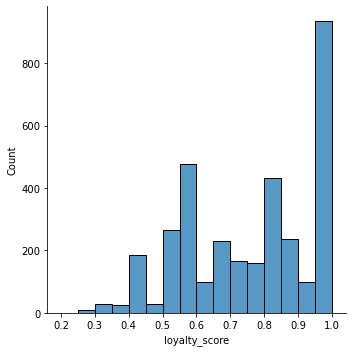

In [28]:
ax = sns.displot(loyalty_df.loyalty_score, kde=False)

### Найдем медианную лояльность клиентов для каждого бренда

In [29]:
brands_loyalty = loyalty_df \
    .groupby('lovely_brand', as_index=False)\
    .aggregate({'loyalty_score':'median', 'user_id':'count'})

In [30]:
brands_loyalty

,lovely_brand,loyalty_score,user_id
0,Brand_1,0.68,410
1,Brand_2,0.60,88
2,Brand_3,0.50,115
3,Brand_4,0.82,2041
4,Brand_5,0.60,5
5,Brand_7,0.44,9
6,Store_Brand,0.75,715


### График показателей лояльности к каждому бренду относительно показателя лояльности

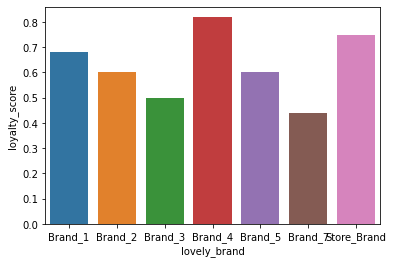

In [31]:
ax = sns.barplot(x='lovely_brand', y='loyalty_score', data=brands_loyalty)

### График показателей лояльности к каждому бренду относительно количества клиентов

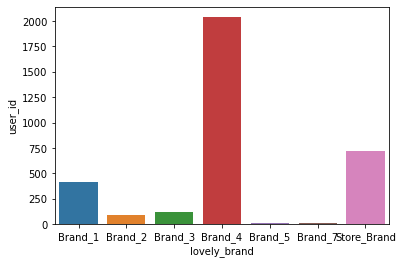

In [32]:
ax = sns.barplot(x='lovely_brand', y='user_id', data=brands_loyalty)